<h1>Question 1</h1>
<p>To analyze the consistency of latency and end to end routes, we considered the ping and traceroute data from sequence 1</p>
<p>First, we analyzed the ping data. I compiled this data into a numpy array holding the average ping for each date and time</p>
<p>Some teams (Team 5 in particular) - did not collect the full two weeks worth of data. In these cases, I masked the numpy array
for 0 values in order to discount these entries from the mean calculation.</p>

In [1]:
import os
import csv
import numpy as np

WEB_MAP = {
    'www_cnn_com': 0,
    'www_etsy_com': 1,
    'www_facebook_com': 2,
    'www_fda_gov': 3,
    'www_letgo_com': 4,
    'www_mayoclinic_org': 5,
    'www_orange_fr': 6,
    'www_twitter_com': 7,
    'www_webmd_com': 8,
    'www_whitehouse_gov': 9,
    'www_medlineplus_gov': 5,
}

In [2]:
size = (8, 10, 14, 2)

ping_dict = np.zeros(size)
for c, team in enumerate(os.listdir("Project3CommunityData")):
    for f in os.listdir(f'Project3CommunityData/{team}/clean_data/seq1'):
          if 'ping_seq1.txt' in f:
                key = f[:-14]
                index = WEB_MAP[key]
                with open(f'Project3CommunityData/{team}/clean_data/seq1/{f}', 'r') as ping:
                    pingreader = csv.reader(ping)
                    date_index = 0
                    date = None
                    time_index = 0
                    time = None
                    count = 1
                    for row in pingreader:
                        if date and date != row[1]:
                            date_index += 1
                            date = row[1]
                            time = None
                            time_index = 0
                            count = 1
                        else:
                            date = row[1]
                            time_index = 0

                        if time and time != row[2]:
                            time_index += 1
                            time = row[2]
                            count = 1
                        else:
                            time = row[2]
                        try:
                            ping_dict[c, index, date_index, time_index] = (ping_dict[c, index, date_index, time_index] + float(row[-1])) / count
                            count += 1
                        except:
                            print(row[-1])

In [3]:
from scipy import stats

y = np.ma.masked_where(ping_dict == 0, ping_dict)

median_by_site = np.ma.median(y, axis=(0, 2, 3))

<h1>Latency Distribution By Team</h1>
<p> The 8 plots below represent each team's latency distribution. As is characteristic of network measurements, we can clearly see that each team's distribution is largely concentrated towards the left of the graph, with a long tail skewed right. Each team's graph has a very tall peak, suggesting that generally speaking, latency is quite consistent and concentrated around this point. Some teams show larger tails suggesting that the connection at their location is more volatile. For instance, Team 4's data trails off to the right much more noticeably with a shorter peak (only height around 80) and far more observations reaching to the right. This suggests that their connection is not quite as stable, perhaps because of other internet users or congestion in the area around those time. In any case, the histograms clearly seem to suggest that latency does depend heavily on location.</p>


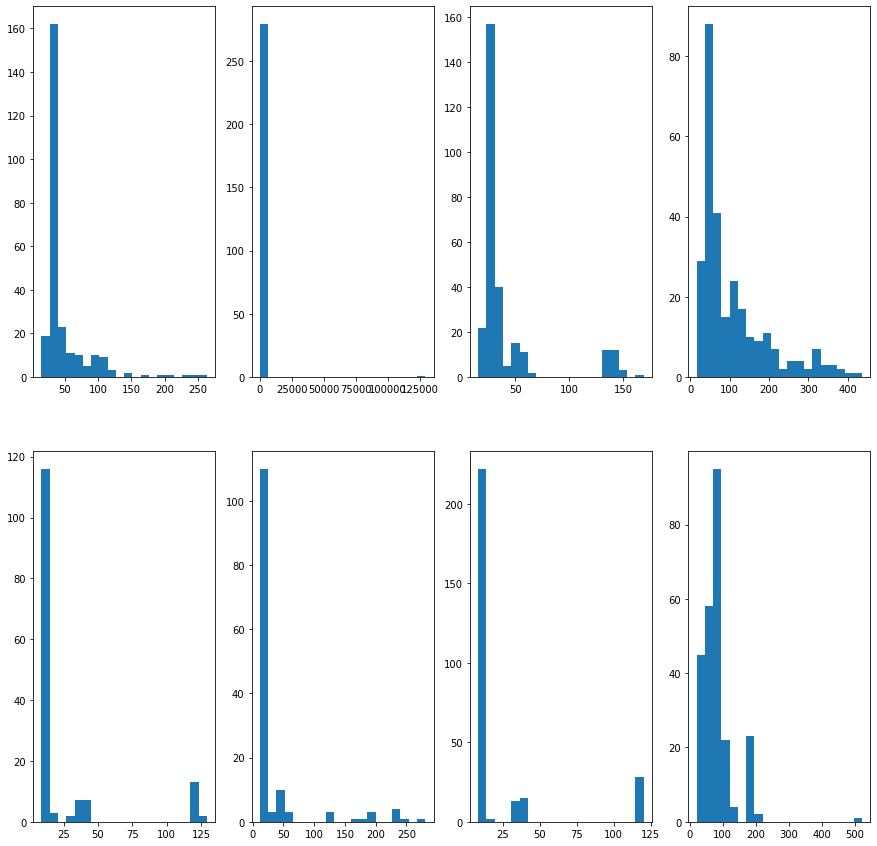

In [15]:
import matplotlib.pyplot as plt
import math

fig1, (ax1, ax2) = plt.subplots(2, 4, figsize=(15,15))

y_1 = y.reshape(8, 280)

for i in range(4):
    ax1[i].hist(y_1[i,:], bins=20)
    ax2[i].hist(y_1[i+4,:], bins=20)

The statistics calculated below back up the observations of the histogram. Based on these statistics, we can see that for the vast majority of teams, 80% of observations are within 10-20ms in terms of latency of the median, suggesting that in general, these connections are relatively stable. Team 5 and Team 6 show particularly stable connections with the majority of latency within 1-2ms of the median. Team 4 sticks out here again with a particularly volatile connection. The 80th percentile for them is more than double the median latency, suggest a particularly large tail and a lot of variance in latency from measurement to measurement.

In [18]:
min = np.ma.min(y_1, axis=1)
std = np.ma.std(y_1, axis=1)
max = np.ma.max(y_1, axis=1)
median = np.ma.median(y_1, axis=1)
eighty = np.quantile(y_1, .8, axis=1)

for i in range(8):
    print(f'Team {i+1} Stats:')
    print('Median:', median[i])
    print('80th quantile:', eighty[i])
    print('Min:', min[i])
    print('Max:', max[i], '\n')

Team 1 Stats:
Median: 35.75340909090909
80th quantile: 52.18109090909093
Std Dev: 35.60057363296419
Min: 14.654545454545454
Max: 263.42727272727274 

Team 2 Stats:
Median: 70.7965909090909
80th quantile: 86.74636363636364
Std Dev: 7700.753829634029
Min: 34.52727272727273
Max: 129170.09318181819 

Team 3 Stats:
Median: 29.26818181818182
80th quantile: 43.96909090909097
Std Dev: 34.09094656737948
Min: 15.554545454545455
Max: 168.97727272727275 

Team 4 Stats:
Median: 68.08636363636363
80th quantile: 159.94545454545462
Std Dev: 88.45977168104785
Min: 15.972727272727274
Max: 435.70454545454544 

Team 5 Stats:
Median: 10.485227272727272
80th quantile: 11.172
Std Dev: 33.292529125272104
Min: 8.969090909090909
Max: 129.25 

Team 6 Stats:
Median: 16.069318181818183
80th quantile: 16.93104545454546
Std Dev: 56.236641448778876
Min: 11.65181818181818
Max: 280.45454545454544 

Team 7 Stats:
Median: 9.602727272727272
80th quantile: 18.140363636363926
Std Dev: 32.89867666863709
Min: 8.29727272727272

<h1>Latency Distribution by Website</h1>
Here, we have latency distributions for each of the 10 websites used in sequence 1. The first thing we notice is that each of the graphs are very similar, (except for Etsy, which is skewed by one very far off value). From the graphs we can also clearly see two peaks in many of these histograms, perhaps because of Team 4's greater latency and more irregular distribution. One clear observation we can make from the graphs is that orange.fr (graph 7) demonstrates significantly higher latency than any of the other sites. This makes sense as most, if not all of the other sites are based in the United States, so we would expect network latency to them to shorter than it would be to a site based in France. To make any further observations however, we will have to look at the statistics.

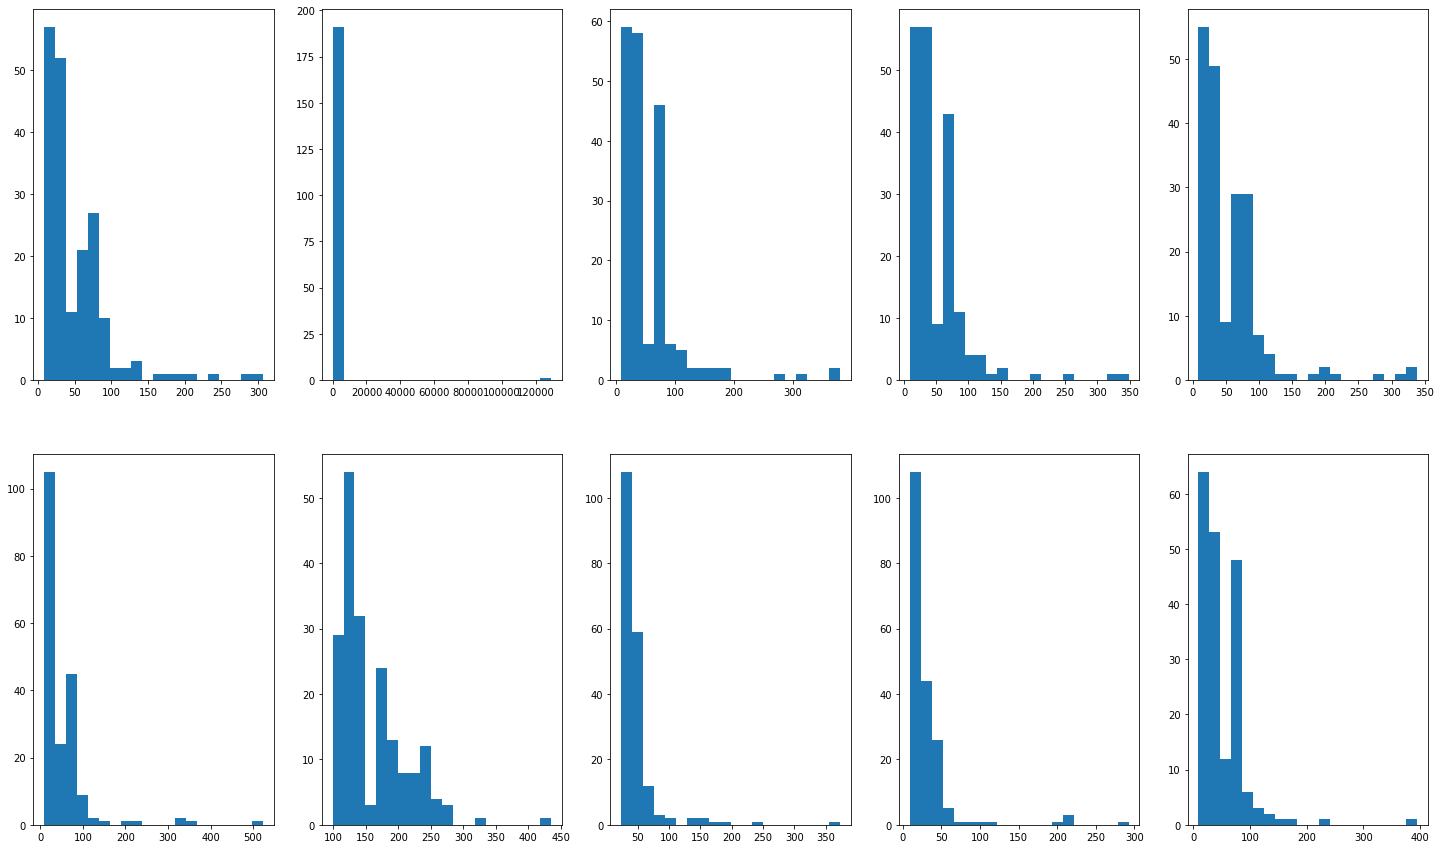

In [22]:
fig1, (ax1, ax2) = plt.subplots(2, 5, figsize=(25,15))

y_1 = np.transpose(y, (1, 0, 2, 3))

y_1 = y_1.reshape(10, -1)

for i in range(5):
    ax1[i].hist(y_1[i,:], bins=20)
    ax2[i].hist(y_1[i+5,:], bins=20)

The statistics tell a similar story to the graphs. Most all of the sites show a median latency of around 30-40ms with an 80th quantile much higher, again probably as a result of Team 4's higher latency creating a larger tail. All websites show a few outlier results with a maximum latency in the 300-400ms range. The two websites that differ from this trend are orange.fr, which demonstrates a much higher median latency because of its further location on average to most of our locations, and whitehouse.gov, which actually surprisingly demonstrates better latency than most of the other websites. A guess for why this might be could be servers closer in proximity to Team 4's location, resulting in better latency to Team 4 and therefore bringing down the median and 80th quantile, or simply less congestion to the site.

In [21]:
min = np.ma.min(y_1, axis=1)
std = np.ma.std(y_1, axis=1)
max = np.ma.max(y_1, axis=1)
median = np.ma.median(y_1, axis=1)
eighty = np.quantile(y_1, .8, axis=1)

for i in range(10):
    print(f'Website {i+1} Stats:')
    print('Median:', median[i])
    print('80th quantile:', eighty[i])
    print('Min:', min[i])
    print('Max:', max[i], '\n')

Website 1 Stats:
Median: 30.57386363636364
80th quantile: 69.85999999999999
Min: 8.297272727272727
Max: 306.05681818181824 

Website 2 Stats:
Median: 36.10454545454546
80th quantile: 80.54545454545456
Min: 8.360000000000001
Max: 129170.09318181819 

Website 3 Stats:
Median: 33.476136363636364
80th quantile: 69.66136363636363
Min: 8.482045454545453
Max: 379.725 

Website 4 Stats:
Median: 35.21136363636364
80th quantile: 70.60363636363637
Min: 9.021818181818182
Max: 348.34772727272724 

Website 5 Stats:
Median: 35.95
80th quantile: 74.90727272727273
Min: 8.467272727272729
Max: 338.5772727272727 

Website 6 Stats:
Median: 31.65
80th quantile: 69.76818181818182
Min: 8.696363636363635
Max: 522.46 

Website 7 Stats:
Median: 138.1818181818182
80th quantile: 190.8181818181818
Min: 99.05000000000001
Max: 435.70454545454544 

Website 8 Stats:
Median: 39.69318181818181
80th quantile: 52.85181818181819
Min: 24.050000000000004
Max: 372.4795454545454 

Website 9 Stats:
Median: 19.46363636363636
80th

<h1>Conclusions on End to End Latency</h1>
Overall end to end latency is generally quite consistent across the two weeks of measurement. As expected looking at around 80% of observations shows latency that is quite close to the median. The other 20% of measurements however, often demonstrate substantially higher latency, ranging up to 400-500ms. This suggests that most of the time, latency is fairly consistent but it can occasionally spike significantly, either because of routing changes, sudden bursts of traffic, or other unpredictable factors.

Latency is dependent on location. Team 4 clearly demonstrated higher and more inconsistent latency than other teams. This could amount to a different location/internet provider, or even inferior networking hardware, slowing down routing on a local level. While for most teams and locations, latency was fairly consistent, it is clear that in extreme cases, locations can drastically affect latency.

Websites also drastically affect latency. Most of the websites we tested were based in the US, and in those cases it appears that latency is fairly consistent across the board. However, when we tested a website overseas (orange.fr), we saw much higher latency, probably because orange.fr does not have any US based servers. In this case, it appears that server location is a big factor in network latency.

<h1>Consistency of Paths</h1>
To analyze path consistency, I simply compared each path against the previous path to see if it was the same. If the paths were identical, I recorded a 0 in the data. If the paths were different, I recorded a 1, this way I could take a mean to determine the percentage of path changes across the 14 days, 4 measurements per day.

In [26]:
size = (8, 10, 56)

traceroute_dict = np.zeros(size)
for c, team in enumerate(os.listdir("Project3CommunityData")):
    for f in os.listdir(f'Project3CommunityData/{team}/clean_data/seq1'):
          if 'tr1_seq1.txt' in f:
                key = f[:-13]
                index = WEB_MAP[key]
                with open(f'Project3CommunityData/{team}/clean_data/seq1/{f}', 'r') as ping:
                    pingreader = csv.reader(ping)
                    row = next(pingreader)
                    previous_trace = []
                    current_trace = []
                    counter = 0
                    while row:
                        current_trace.append(row[4][:10])
                        try:
                            row = next(pingreader)
                        except StopIteration:
                            break
                        while row and row[3] != '1':
                            current_trace.append(row[4][:10])
                            try:
                                row = next(pingreader)
                            except StopIteration:
                                break
                        if previous_trace and previous_trace != current_trace:
                            traceroute_dict[c, index, counter] = 1
                        else:
                            traceroute_dict[c, index, counter] = 0
                        counter += 1
                        previous_trace = current_trace
                        current_trace = []

In [27]:
means_by_site = np.mean(traceroute_dict, axis=(0,2))
means_by_team = np.mean(traceroute_dict, axis=(1,2))
means_by_team_by_site = np.mean(traceroute_dict, axis=2)


<h1>Route Consistency By Website</h1>
We see that for most sites route changes happen less than 20% of the time (this conveniently lines up with the conventional 80th percentile measurement often taken in networking measurements. Three sites demonstrated substantially higher route changes. These are the two government sites (FDA and White House) and the french news site (orange.fr). The French news site displaying more route changes makes sense. With a longer path to travel in order to reach its destination, it makes sense that there would be a greater possibility of route changes in its path. The two government sites I am less sure about why they would have so many route changes, but one possibility is that they have to maintain certain server setups or networking guidelines to adhere to national security requirements which result in more route changes. This is just speculation however, and I do not have a clear understanding of this trend.

Twitter, Facebook and CNN all demonstrated much lower than average changes in routes. Twitter and Facebook are sensible as both websites are owned by massive tech companies which probably have a better understanding of networking infrastructure and are more willing to devote resources to building more servers and reducing the number of route changes to reduce potential latency bottlenecks. I can also see reducing unexpected latency as a result of route changes being a priority for an organization like CNN who relies on providing people news as quickly as possible. The other news site in our data set is from overseas so it is hard to tell if this is a trend or not however.

<BarContainer object of 10 artists>

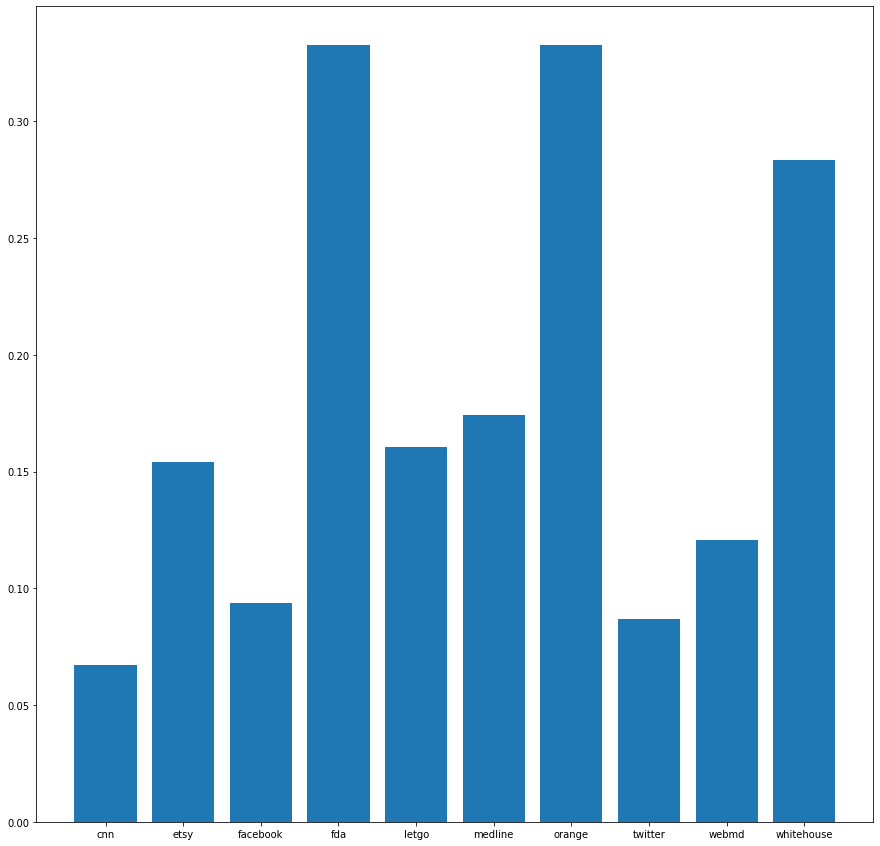

In [29]:
fig1, ax1 = plt.subplots(figsize=(15,15))

labels = ['cnn', 'etsy', 'facebook', 'fda', 'letgo', 'medline', 'orange', 'twitter', 'webmd', 'whitehouse']

ax1.bar(labels, means_by_site)

Looking at the number of route changes by each team, it appears that the percentage of route changes is generally quite consistent across teams except for the in the case of Team 1, which showed a very high more than 40% change in routes. I initially suspected this may be an issue with how testing was done, i.e. a changing local IP each day or some other factor on the local end, but even ignoring the first few variables of the trace showed a higher than expected ~35% route changes from the previous route. My best guess is that Team 1's ISP is different from many of the other teams' and handles traffic differently, perhaps routing it through different servers quite often due to congestion at the time of measurement, but I am not sure in this case.

<BarContainer object of 8 artists>

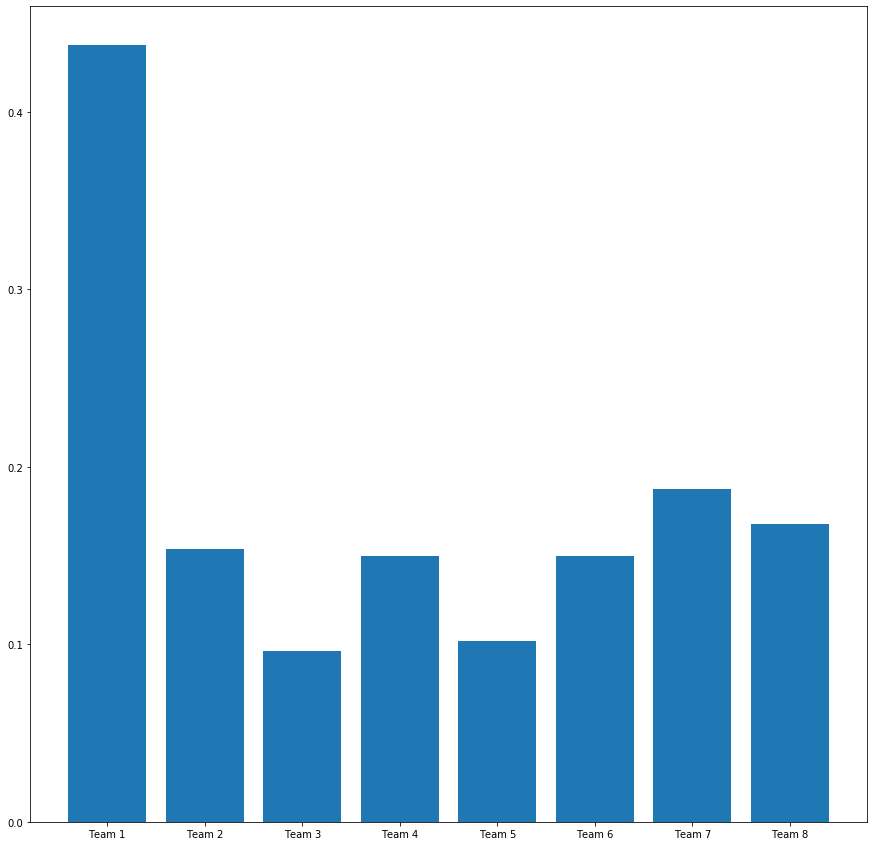

In [30]:
fig1, ax1 = plt.subplots(figsize=(15,15))

labels = [f'Team {i+1}' for i in range(8)]

ax1.bar(labels, means_by_team)

As a sanity check, I broke out the results by website for each team to see if trend remained consistent across teams. Most teams did have at least 2 or 3 peaks for FDA, White House, and Orange, but some showed very different trends. For example, Team 8 had a lot of route changes on medline and Team 4 had no route changes on Orange. This demonstrates that location does have an effect on which routes change more frequently, perhaps because of proximity to a server for that website. If there is only 1 server for a website that is close to a location for example, it stands to reason that there would be fewer route changes going to that server.

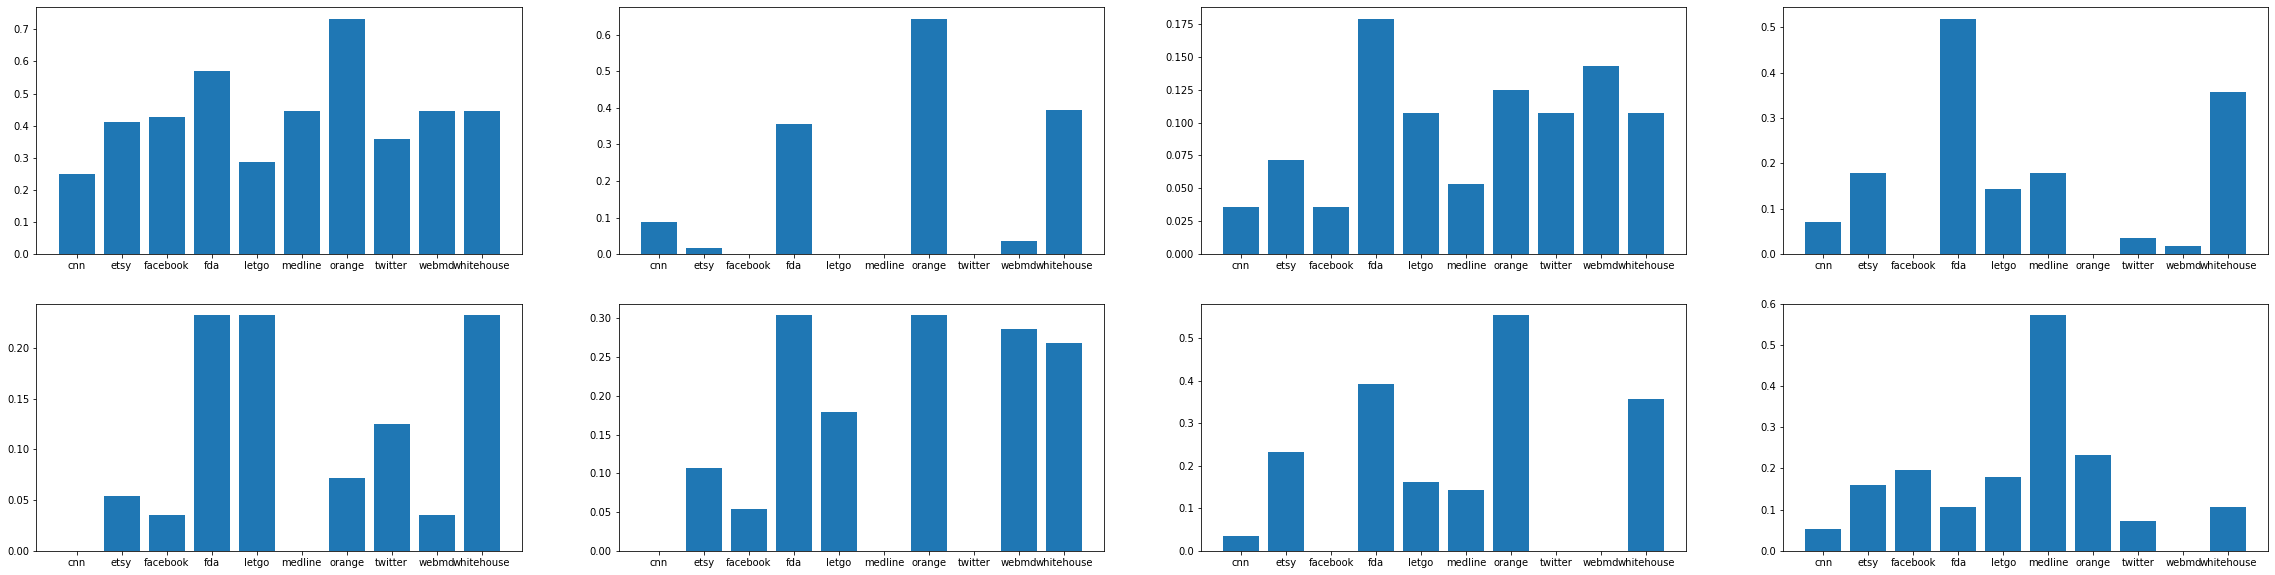

In [31]:
fig1, (ax1, ax2) = plt.subplots(2, 4, figsize=(40,10))

labels = ['cnn', 'etsy', 'facebook', 'fda', 'letgo', 'medline', 'orange', 'twitter', 'webmd', 'whitehouse']

for i in range(4):
    ax1[i].bar(labels, means_by_team_by_site[i,:])
    ax2[i].bar(labels, means_by_team_by_site[i+4,:])

Overall conclusions for route changes are that they are not as consistent as I might have initially expected and actually change quite often, up to 70% of the time for some website and team combinations. This consistency is dependent on team location, as it appears that certain locations have more stable routes to some websites than others. This consistency is also dependent on website, as it appears that certain websites, particularly FDA, White House, and Orange, have properties that make them susceptible to many more route changes than other websites.